Goal: visualize the filters learned by our convnet.

Author: Dustin Anderson

In [48]:
# Package imports
import numpy as np
np.random.seed(2341)

import matplotlib.pyplot as plt
%matplotlib inline

import utils
import drawing

In [2]:
det_shape = (100, 100)

[[  6.55540106   9.14473706]
 [ 17.12684112  -1.58956415]
 [ 20.61422854   2.49467937]
 [ 35.44317275 -13.39297563]
 [ 39.85440935 -18.02848494]
 [ 47.75847966 -22.53570343]
 [ 77.7283841  -26.12159039]
 [ 85.04386643 -18.37036828]]


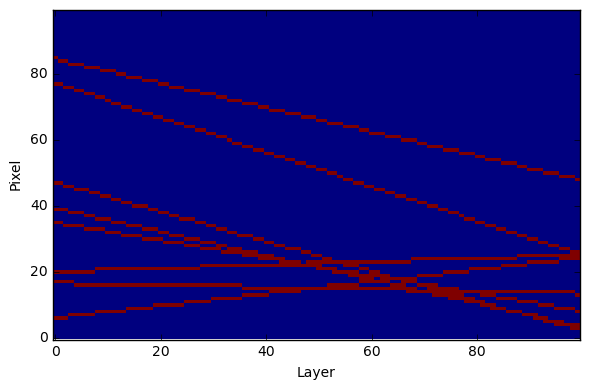

In [49]:
# Test the multi-track generator
tracks, targets = utils.gen_n_tracks_nocov(n_tracks=8, det_shape=det_shape).next()
drawing.draw_event(tracks[0,0])
print targets[0]

In [6]:
# Train the model
pretrainable_model_12 = utils.PretrainableModel(n_tracks=12, det_shape=det_shape)
pretrainable_model_12.train_track_pred_model(epochs=10)

Epoch 1/10
256000/256000 [==============================] - 171s - loss: 167.2082   
Epoch 2/10
256000/256000 [==============================] - 171s - loss: 29.1537   
Epoch 3/10
256000/256000 [==============================] - 172s - loss: 17.7907   
Epoch 4/10
256000/256000 [==============================] - 171s - loss: 14.6644   
Epoch 5/10
256000/256000 [==============================] - 172s - loss: 12.8685   
Epoch 6/10
256000/256000 [==============================] - 172s - loss: 11.8312   
Epoch 7/10
256000/256000 [==============================] - 171s - loss: 12.4421   
Epoch 8/10
256000/256000 [==============================] - 171s - loss: 10.4019   
Epoch 9/10
256000/256000 [==============================] - 171s - loss: 10.1832   
Epoch 10/10
256000/256000 [==============================] - 171s - loss: 9.9029   


In [78]:
pretrainable_model_12.train_track_pred_model(epochs=10)

Epoch 1/10
256000/256000 [==============================] - 171s - loss: 9.4707   
Epoch 2/10
256000/256000 [==============================] - 171s - loss: 9.2930   
Epoch 3/10
256000/256000 [==============================] - 171s - loss: 9.2524   
Epoch 4/10
256000/256000 [==============================] - 171s - loss: 8.9822   
Epoch 5/10
256000/256000 [==============================] - 171s - loss: 8.7504   
Epoch 6/10
256000/256000 [==============================] - 171s - loss: 8.7001   
Epoch 7/10
256000/256000 [==============================] - 171s - loss: 8.4831   
Epoch 8/10
256000/256000 [==============================] - 171s - loss: 8.3805   
Epoch 9/10
256000/256000 [==============================] - 171s - loss: 8.2047   
Epoch 10/10
256000/256000 [==============================] - 171s - loss: 8.1749   


[[  0.41567188  45.88653387   0.           0.           0.        ]
 [ 13.41371423  15.7013653    0.           0.           0.        ]
 [ 26.00695957  -4.85401543   0.           0.           0.        ]
 [ 26.37184424  -4.97641998   0.           0.           0.        ]
 [ 31.2570107   -8.24486589   0.           0.           0.        ]
 [ 56.75979146  18.24494976   0.           0.           0.        ]
 [ 58.88019004   6.40974696   0.           0.           0.        ]
 [ 63.06819236 -24.8782387    0.           0.           0.        ]
 [ 64.84624376 -22.77543157   0.           0.           0.        ]
 [ 67.49321532  -4.25053791   0.           0.           0.        ]
 [ 77.92325824  -7.68468721   0.           0.           0.        ]
 [ 96.64557977  -2.27027513   0.           0.           0.        ]]
[[  4.75042164e-01   4.54693756e+01   1.00013983e+00   1.05548277e-03
    9.98251975e-01]
 [  1.21058979e+01   1.68210220e+01   9.99947250e-01   1.46845693e-03
    9.97500062e-01]
 [ 

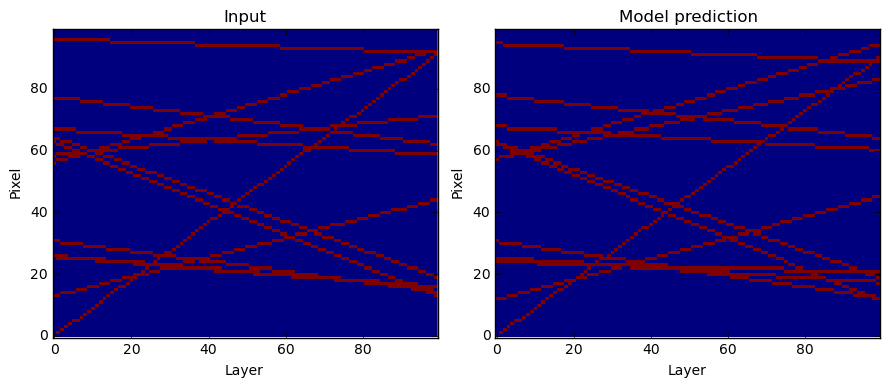

In [86]:
pretrainable_model_12.make_pred()

In [87]:
conv_model = pretrainable_model_12.conv_model
pics = {}
num_filters = {"convolution2d_5":8, "convolution2d_6":8, "convolution2d_7":32, "convolution2d_8":32}
for layer_name, n_filters in num_filters.iteritems():
    pics[layer_name] = []
    for i_filter in range(n_filters):
        pics[layer_name].append( utils.visualize_filter(conv_model, layer_name, i_filter, 
                                   det_shape=pretrainable_model_12.det_shape, n_steps=100) )

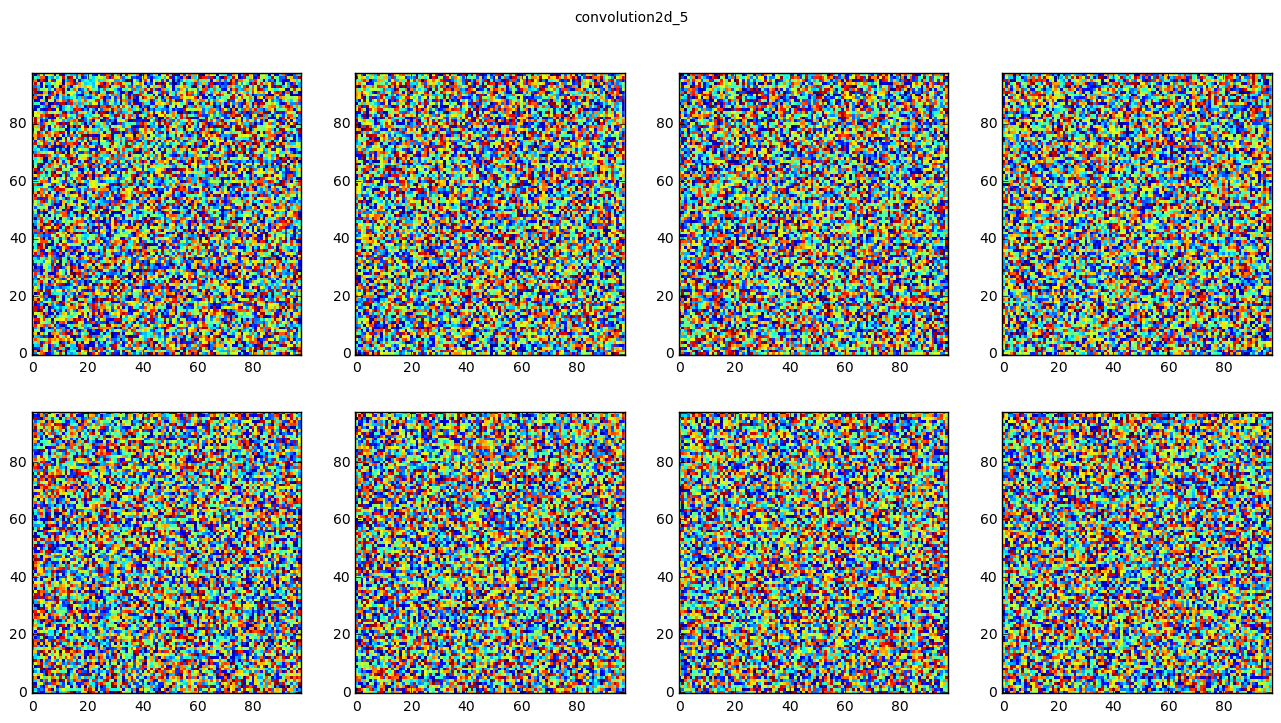

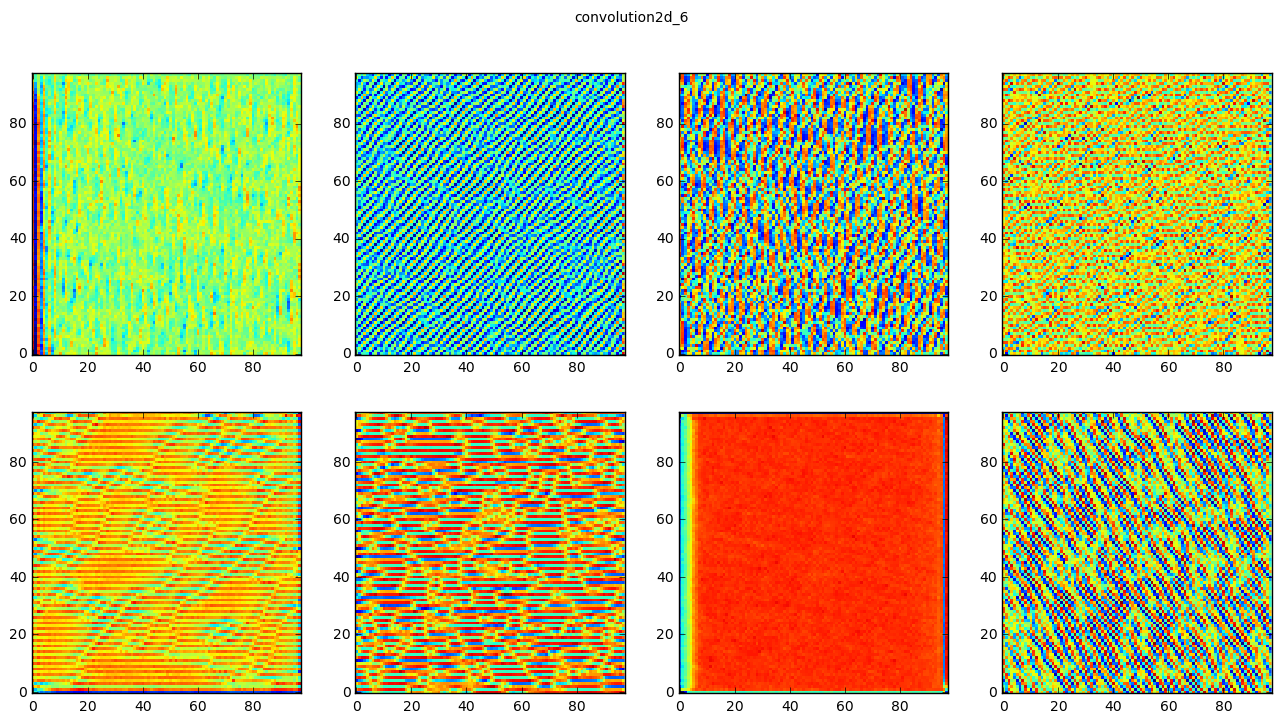

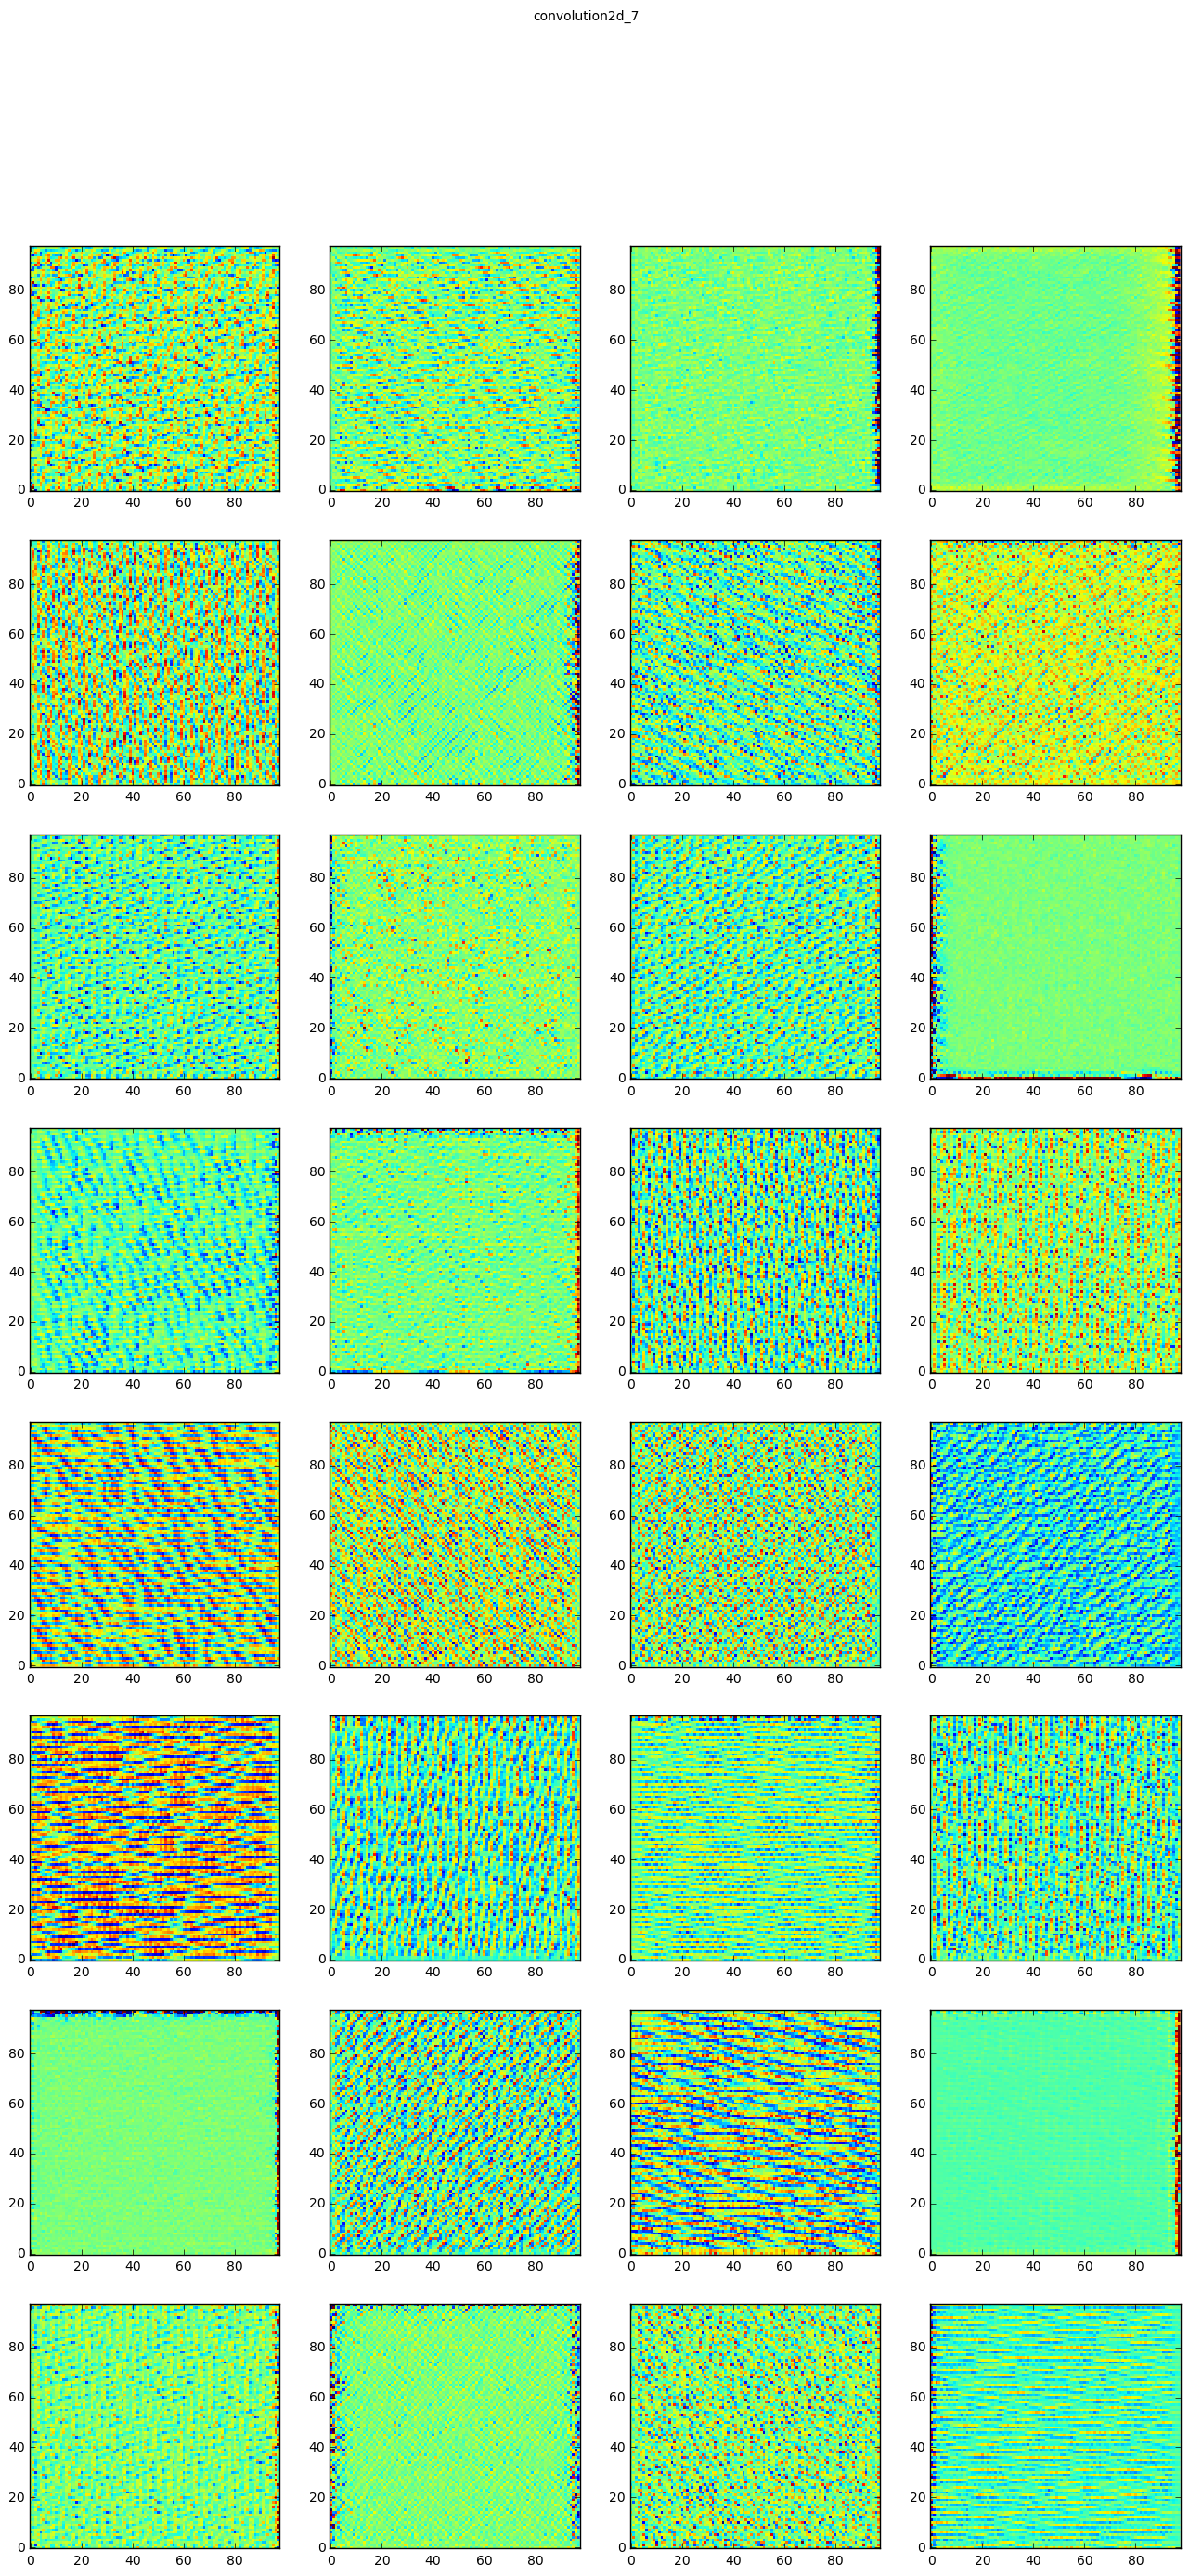

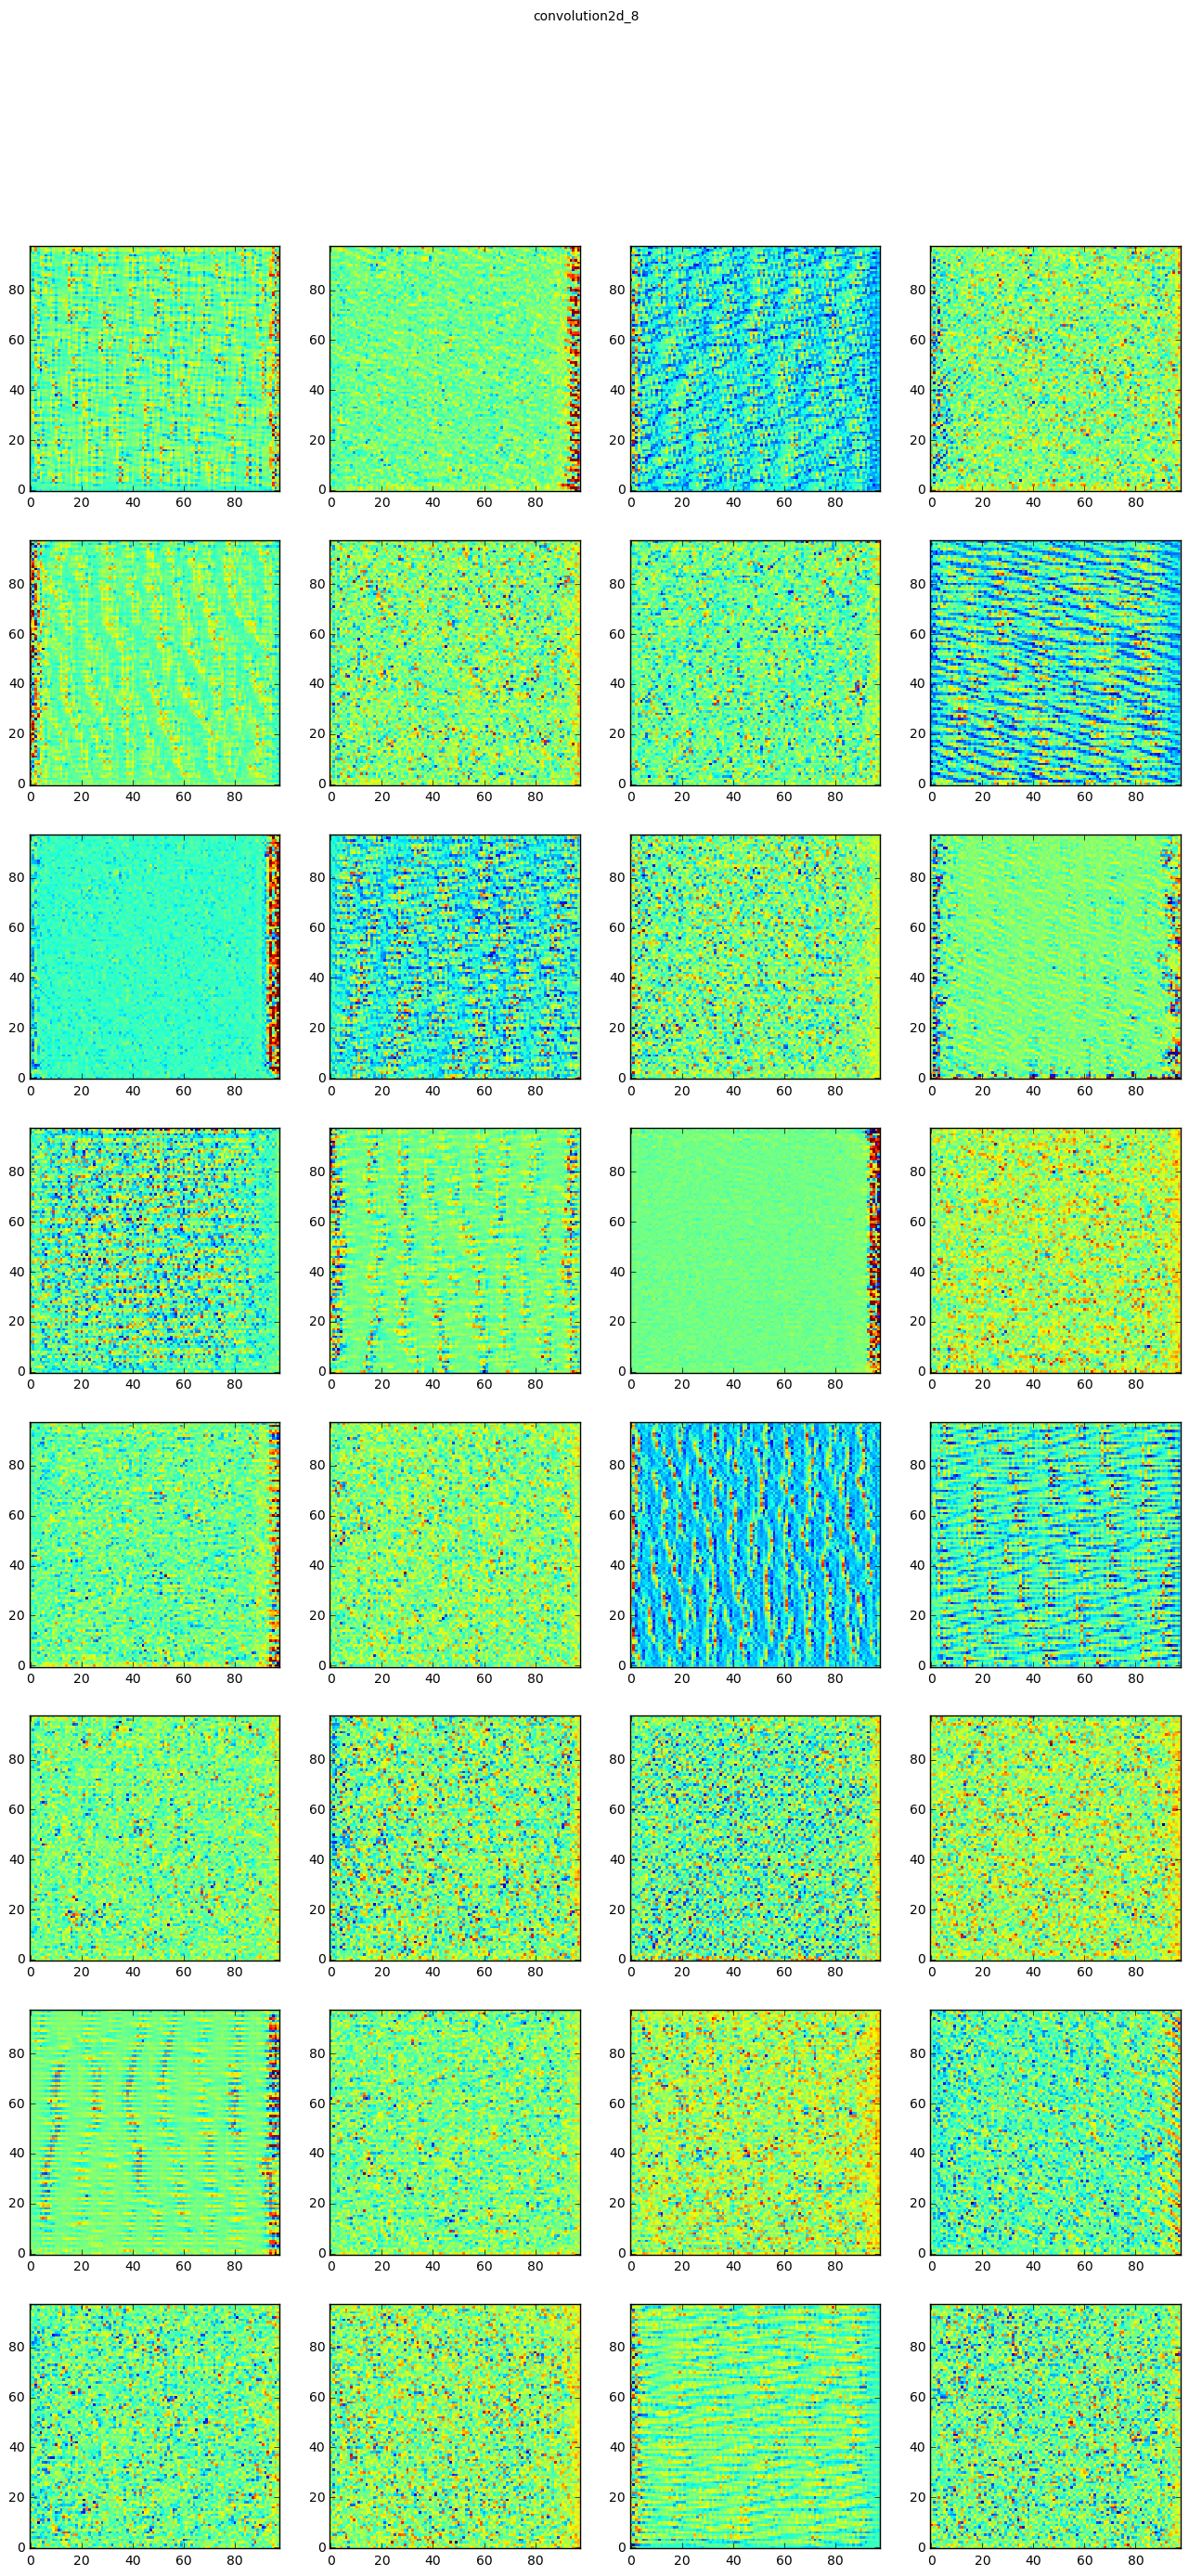

In [88]:
for layer_name in sorted(pics.keys()):
    images = pics[layer_name]
    drawing.draw_filter_vis(images, n_columns=4, title=layer_name)